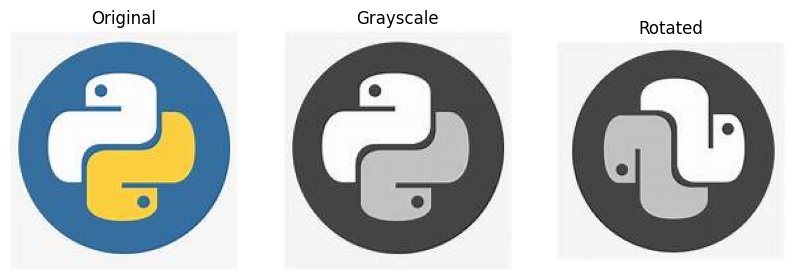

In [25]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('img.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rotated_image = cv2.rotate(gray_image, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rotated_image, cmap='gray')
plt.title('Rotated')
plt.axis('off')

plt.show()


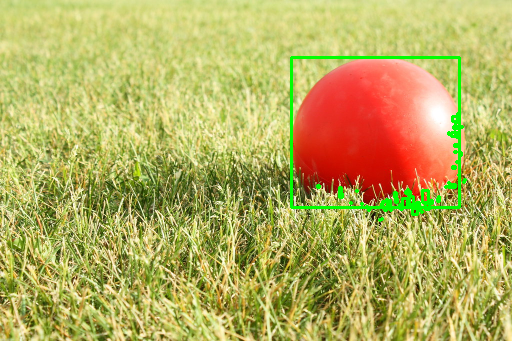

In [26]:
import cv2
from google.colab.patches import cv2_imshow

image = cv2.imread('ball.jpg')

height, width = image.shape[:2]
resized_image = cv2.resize(image, (width // 2, height // 2))
hsv = cv2.cvtColor(resized_image, cv2.COLOR_BGR2HSV)
lower_red = cv2.inRange(hsv, (0, 50, 50), (10, 255, 255))
contours, _ = cv2.findContours(lower_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(resized_image)


In [ ]:
import cv2
import numpy as np

config_path = "C:/Users/Khuteeja/Downloads/yolov3.cfg"
weights_path = "C:/Users/Khuteeja/Downloads/yolov3.weights"
names_path = "C:/Users/Khuteeja/Downloads/coco.names"

# Load YOLO network
net = cv2.dnn.readNet(weights_path, config_path)

# Set OpenCV DNN backend and target to use OpenCL for GPU acceleration if available
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_OPENCL)

# Load class names
with open(names_path, "r") as f:
    classes = [line.strip() for line in f.readlines()]

print("YOLO network loaded successfully")
print("Classes loaded:", classes)
